# SMS Spam Detection 

In [1]:
# importing librearies 

In [107]:
import numpy as np 
import pandas as pd 
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score ,recall_score,f1_score

# Reading the data set 

In [26]:
import pandas as pd
sms_df = pd.read_csv('D:\\Data Sets\\spam.csv', encoding='latin-1')

In [105]:
sms_df.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
print (sms_df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [29]:
 sms_df=sms_df.rename(columns={"v1":"label","v2":"text"})

In [30]:
print (sms_df.columns)

Index(['label', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [31]:
sms_df = sms_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
# After reading the data realized that Unnamed:2 Unnamed :3 Unnamed :4 need to drop as they have NaN values.

In [32]:
print (sms_df.columns)

Index(['label', 'text'], dtype='object')


# Exploring the data 

In [33]:
print ("No of rows:", len(sms_df))

No of rows: 5572


In [34]:
sms_df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [35]:
sms_df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [36]:
sms_df['length']=sms_df['text'].apply(len)
sms_df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

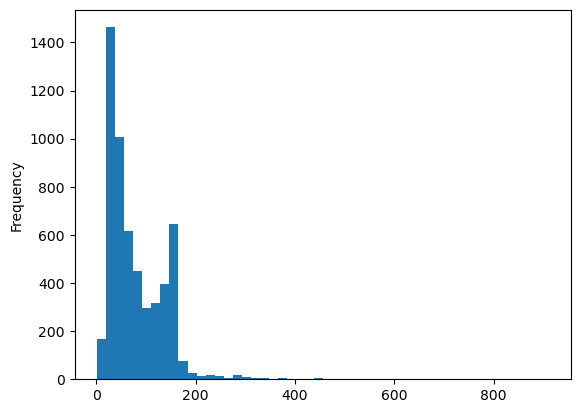

In [37]:
sms_df['length'].plot( bins= 50, kind= "hist")

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

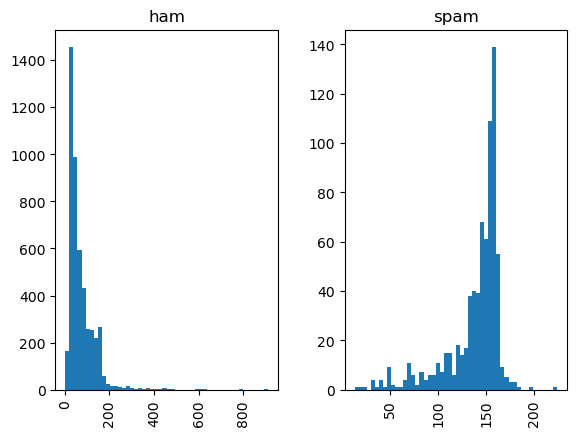

In [38]:
sms_df.hist(column='length',by ='label',bins= 50)

In [39]:
sms_df.loc[:,'label']=sms_df.label.map({'ham':0, 'spam':1})
sms_df.head()

C:\Users\Harshit  Dwivedi\AppData\Local\Temp\ipykernel_13704\3836554741.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sms_df.loc[:,'label']=sms_df.label.map({'ham':0, 'spam':1})


,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Impleting bag of words 

In [74]:
count= CountVectorizer()

test=count.fit_transform(sms_df['text'])
x_train, x_test, y_train, y_test = train_test_split(test, sms_df['label'], test_size=0.20, random_state=1)

In [61]:
x_train=count.fit_transform(x_train)
x_test=count.fit_transform(x_test)

In [78]:
print (x_train.shape)
print (x_test.shape)

(4457, 8672)
(1115, 8672)


# implementation of ML model

In [108]:
model=BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

In [109]:
prediction = model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [110]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
print ("BernoulliNB")
print("Accuracy Score: {:.0f}%".format(accuracy * 100))
print("Precision Score: {:.0f}%".format(precision * 100))
print("Recall Score: {:.0f}%".format(recall * 100))
print("F1 Score: {:.0f}%".format(f1 * 100))

BernoulliNB
Accuracy Score: 99%
Precision Score: 98%
Recall Score: 91%
F1 Score: 94%


In [114]:
model=MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [115]:
prediction = model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [116]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
print('MultinomialNB')
print("Accuracy Score: {:.0f}%".format(accuracy * 100))
print("Precision Score: {:.0f}%".format(precision * 100))
print("Recall Score: {:.0f}%".format(recall * 100))
print("F1 Score: {:.0f}%".format(f1 * 100))

MultinomialNB
Accuracy Score: 98%
Precision Score: 89%
Recall Score: 94%
F1 Score: 92%


# Insights

**Bernoulli Naive Bayes:**

Bernoulli Naive Bayes is a variant of the Naive Bayes algorithm that is designed for binary features (0 or 1), such as the presence or absence of certain words in a document. It assumes that the features are binary variables, often obtained by thresholding word counts in the document. This model calculates the probabilities of features given the class label and uses Bayes' theorem to make predictions. The output is the class label that has the highest posterior probability.

From your evaluation results:
- Accuracy Score: 99%
- Precision Score: 98%
- Recall Score: 91%
- F1 Score: 94%

It seems that the Bernoulli Naive Bayes model has performed very well in terms of accuracy, precision, and F1 score. However, the recall score is a bit lower, indicating that it might not capture all positive cases as effectively.

**Multinomial Naive Bayes:**

Multinomial Naive Bayes is another variant that is commonly used for text classification when features represent word frequencies or counts in documents. It's well-suited for cases where features can take on integer values (such as the frequency of words in a document).

From your evaluation results:
- Accuracy Score: 98%
- Precision Score: 89%
- Recall Score: 94%
- F1 Score: 92%

The Multinomial Naive Bayes model also shows good performance, with a strong recall score indicating its ability to capture positive cases, but with a slightly lower precision score compared to Bernoulli Naive Bayes.

Both models leverage the underlying principles of Naive Bayes to make predictions based on the probability of features given the class label. Your choice of model depends on the specific characteristics of your data and the trade-offs you want to make between precision, recall, and other metrics.
